ChEn-5310: Computational Continuum Transport Phenomena Spring 2021 UMass Lowell; Prof. V. F. de Almeida **05Mar21**

# 06. Poisson 1D with Dirichlet-Robin Boundary Conditions
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\fvec}{\boldsymbol{\mathsf{f}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \newcommand{\Reals}{\mathbb{R}}
  \newcommand{\thetavec}{\boldsymbol{\theta}}
$

---

## Table of Contents<a id="toc"></a>
* [Objectives](#obj)

1. [Linear Transfer, Normal Flux Boundary Condition Case (Robin)](#rbc)
 + [Strong Form of Problem Statement](#rbcstrong)
 + [Variational Form of Problem Statement](#rbcweak)
 + [Problem Setup](#rbcsetup)
  - [Input File](#rbcinput)
  - [Run App](#rbcrun)
  - [Quadratic Lagrange FEM Results](#rbcquadfemresults1)
---

## [Objectives](#toc)<a id="obj"></a>

 + Begin using [`MOOSE`](https://mooseframework.inl.gov) to practice solving ODE's. Therefore access to a working [`MOOSE`](https://mooseframework.inl.gov) installation is necessary. Additional local information on installation for your computer setting can be found [here](https://github.com/UML-Linux-Club/moose-info).
 + Introduce the Galerkin variational (weak) form of the Poisson 1D problem below ([OneNote notes here](https://studentuml-my.sharepoint.com/:o:/g/personal/valmor_dealmeida_uml_edu/Eib-vZHIpRlPlOMtz0Gf_asBegEFKsl9dOK4nHyDbgSeUA?e=sLu1td)).
 + Introduce the use of the Dirichlet-Robin boundary condition.
 + Use second order accurate finite element Lagrange basis functions to solve the problem numerically.
 + <span style="color:red">Some initial code is provided in the course repository but no full source code is given out. If you do not do a minimum of programing you will not learn basic aspects of this subject. Hands-on work during lectures will fill in this gap. If you do all the steps proposed in this notebook and attend the working lectures you will only have an initial knowledge of the subject.</span>

## [Linear Transfer Normal Flux Boundary Condition Case (Robin)](#toc)<a id="rbc"></a>

A linear transfer condition imposed on the normal flux is a model for relating the unknown variable $u$ to external conditions of transport. Here the simplest linear case is the boundary condition

\begin{equation*}
 q(b) := h\,(u - u_\infty)
\end{equation*}

where $h\ge 0$ is a *transport coefficient* and $u_\infty$ is a reference value away from the exit point that drives the flux. Therefore this condition of transfer drives the variable $u$ towards $u_\infty$ for sufficiently high $h$.

In the literature, this boundary condition is related to the **Robin boundary condition** which is given on the *normal derivative* (or normal gradient) of the unknown variable. This is not the same as the *normal* diffusion flux $q_n$ associated to $u$, but related.

### [Strong Form of Problem Statement](#toc)<a id="rbcstrong"></a>

Solve the Poisson model problem. Find $u:[a,b]\in\Reals\rightarrow\Reals$ for $D > 0$ such that:

\begin{align*}
 -\bigl(-D\, u'\bigr)'(x) + S &= 0 \quad \forall \quad x\in [a,b], \\
 u(a) &= A, \\
 q(b) &=  h\,(u - u_\infty).
\end{align*}
   
Solve this problem analytically for the constants: diffusion coefficient, $D$, source, $S$, entry concentration, $A$, mass transfer coefficient, $h$, and driving force concentration, $u_\infty$. 

### [Variational Form of Problem Statement](#toc)<a id="rbcweak"></a>

The Galerkin weak formulation is as follows. Find $u \in H^1\!\bigl([a,b]\bigr)$ so that 

\begin{align*}
 \int\limits_a^b -D\, u'(x)\,v'(x)\,dx - h\,\bigl(u(b) - u_\infty\bigr)\,v(b) + \int\limits_a^b S\,v(x)\,dx  &= 0 \quad \forall \quad v \in H^1_0\!\bigl([a,b]\bigr), 
\end{align*}

where $H^1\!\bigl([a,b]\bigr) := \bigl\{ u:[a,b]\in\Reals\rightarrow \Reals \mid \int_a^b u'^2\,dx < \infty \bigr\}$ and 
$H^1_0\!\bigl([a,b]\bigr) := \bigl\{ v \mid v \in H^1\!\bigl([a,b]\bigr), v(a) = 0 \bigr\}$. This weak form is a modified Galerkin's weak form including the Neumann boundary condition.

### [Dirichlet-Robin Energy](#toc)<a id="rbcenergy"></a>

The associated energy that the variational form minimizes is the **mixed Dirichlet/Robin total energy**:

\begin{align*}
 \Phi[u] := \int\limits_a^b \,\frac{1}{2}q^2 - D\,S\,u(x) \,dx + D\,h\,\bigl(u(b)-u_\infty\bigr)\,u(b).
\end{align*}

This is very much the same as the Dirichlet-Neumann energy except that the boundary energy term depends on the unknown variable evaluated at the boundary.

### [Problem Setup](#toc)<a id="rbcsetup"></a>

The previously developed code in [Notebook 07](https://nbviewer.jupyter.org/github/dpploy/engy-5310/blob/main/notebooks/07-poisson-1d-neumann.ipynb), for the constant normal flux boundary condition case, remains usable here by design. The normal diffusion flux was programmed in the general linear form:

\begin{equation*}
 q_n(x) =  q_\text{bias} + h\,\bigl(u(x) - u_\infty\bigr),
\end{equation*}

where the constant $q_\text{bias}$, used for the previous example case with constant normal flux boundary condition, is now set to zero value. The other two parameters ($h$ and $u_\infty$) need to be prescribed as shown in the input block below.

#### [Input File](#toc)<a id="rbcinput"></a>

Using a previous `input.i` input file (edit with a text editor), the `exit` block was modified as follows:

```
[BCs]
  [entry]
    type = DirichletBC      # from MOOSE
    variable = u
    boundary = left
    value = 3.00000e+00
  []
  [exit]
    type = NormalFluxBC           # user coded
    variable = u
    boundary = right
    bias = 0.00000e+00            # user coded
    transferCoeff = 1.00000e-01   # user coded
    reference = 5.00000e+00       # user coded
  []
[]

```

Save the input file in the `.../engy5310p1/` directory.

#### [Run Application](#toc)<a id="rbcrun"></a>

1. Run app: in the same directory run the application with the Linux shell command:
 + `./engy5310p1-opt -i input.i`

#### [Quadratic Lagrange FEM](#toc)<a id="rbcquadfemresults1"></a>

Solve problem with parameter values:

> + a = 0 cm
> + b = 25 cm
> + A = 3 g/cc
> + h = 0.1 cm/s
> + u_infinity = 5 g/cc
> + D = 0.1 cm^2/s
> + S = 5e-2 g/cc-s

FEM parameters:

> + Basis Functions: Second Order Lagrangian
> + num. of finite elements: 1

In [21]:
'''FEM Solution'''

x_a = 0
x_b = 25
u_a = 3

mass_transfer_coeff = 0.1
u_infinity = 5             # external reference value

diff_coeff = 0.1
source_s = 5e-2

n_felem = 2
order = 'second'
#n_plot_pts = 2*n_felem + 1
n_plot_pts = 10

from engy_5310.toolkit import write_engy5310_p1_input_file

write_engy5310_p1_input_file(x_a, x_b, u_a=u_a, 
                             transfer_coeff=mass_transfer_coeff, u_reference=u_infinity, 
                             diff_coeff=diff_coeff, source_s=source_s, n_felem=n_felem, order=order, 
                             n_plot_pts=n_plot_pts)

In [22]:
'''Display MOOSE input file created'''

!cat engy5310p1/new_input.i

# Engy-5310 Problem 1: Poisson 1D FEM
# UMass Lowell Nuclear Chemical Engineering
# Prof. Valmor F. de Almeida
# 05Mar21 14:10:22

# Parameters
xmin = 0.00000e+00
xmax = 2.50000e+01
diff_coeff = 1.00000e-01
source_s = 5.00000e-02
transfer_coeff = 1.00000e-01
var_reference = 5.00000e+00

[Mesh]
  [1d]
    type = GeneratedMeshGenerator
    dim = 1
    xmin = ${replace xmin}
    xmax = ${replace xmax}
    nx = 2
    elem_type = edge3
  []
[]

[Variables]
  [u]
    order = second
    family = lagrange
  []
[]

[AuxVariables]
  [diffFluxU_x]
    order = FIRST
    family = MONOMIAL
  []
[]

[Kernels]
  [diffusion-term]
    type = DiffusionTerm
    variable = u     # produced quantity
    diffCoeff = ${replace diff_coeff}
  []
  [source-term]
    type = SourceTerm
    variable = u     # add to produced quantity
    sourceS = ${replace source_s}
  []
[]

[AuxKernels]
  [diffusion-flux-x]
    execute_on = timestep_end
    type = DiffusionFluxComponent
    field = u
    diffCoeff = ${replace dif

In [23]:
'''Run Engy5310P1 MOOSE App'''

!engy5310p1/engy5310p1-opt -i engy5310p1/new_input.i



Framework Information:
MOOSE Version:           git commit 6fac045ef1 on 2021-02-25
LibMesh Version:         ed76100f41840c34c146dd0a7f1ff5410370b489
PETSc Version:           3.13.5
SLEPc Version:           3.13.3
Current Time:            Fri Mar  5 14:10:22 2021
Executable Timestamp:    Fri Mar  5 13:49:39 2021

Parallelism:
  Num Processors:          1
  Num Threads:             1

Mesh: 
  Parallel Type:           replicated
  Mesh Dimension:          1
  Spatial Dimension:       1
  Nodes:                   
    Total:                 5
    Local:                 5
  Elems:                   
    Total:                 2
    Local:                 2
  Num Subdomains:          1
  Num Partitions:          1

Nonlinear System:
  Num DOFs:                5
  Num Local DOFs:          5
  Variables:               "u" 
  Finite Element Types:    "LAGRANGE" 
  Approximation Orders:    "SECOND" 

Auxiliary System:
  Num DOFs:                4
  Num Local DOFs:          4
  Variables:    

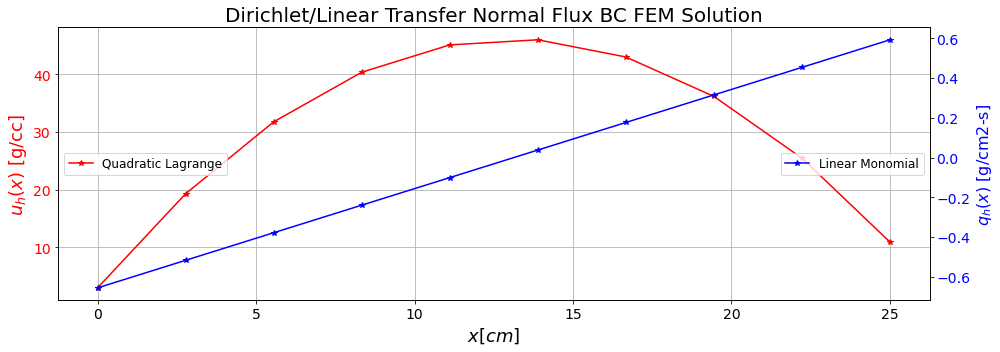

In [24]:
'''Show FEM Solution'''

import pandas as pd
df = pd.read_csv('output_x-data_0002.csv')

plot_solution(df, title='Dirichlet/Linear Transfer Normal Flux BC FEM Solution', basis_functions_type='Quadratic Lagrange', flux_basis_functions_type='Linear Monomial')